In [5]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import StrVector
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import pandas as pd
import numpy as np
import prep
import statsmodels.api as sm
import matplotlib.pyplot as plt
%load_ext rpy2.ipython

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
DATA_PATH = "../data/2020/survey_results_public.csv"
data = pd.read_csv(DATA_PATH)

In [11]:
data, keep, groups, categorical, numeric, base = prep.prep(data)

Removing 65 respondents with missing income
6008 developers left in the sample after cleaning
139 or 2.3% black developers in the sample with multiracial replacement


In [12]:
X, Y = prep.design_matrix(data, categorical, numeric, base)

Design matrix complete with 205 variables/columns


In [194]:
D = "Ethnicity"

In [195]:
results = analyze.analyze(Y, X, D)

In [196]:
results

,coefficients,se,t,p,lower,upper
"Ethnicity_Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)",-0.178365,0.159987,-1.114875,0.264904,-0.491934,0.135203
Ethnicity_East Asian,0.091253,0.033443,2.728627,0.006360,0.025706,0.156800
Ethnicity_Southeast Asian,-0.011105,0.045974,-0.241552,0.809128,-0.101212,0.079002
Ethnicity_Multiracial,0.024612,0.020883,1.178536,0.238583,-0.016319,0.065543
Ethnicity_Middle Eastern,-0.046855,0.058793,-0.796950,0.425480,-0.162088,0.068377
Ethnicity_Hispanic or Latino/a/x,-0.012791,0.029721,-0.430366,0.666929,-0.071044,0.045462
Ethnicity_Black or of African descent,-0.049730,0.033818,-1.470524,0.141420,-0.116013,0.016552
Ethnicity_no_answer,-0.048054,0.029146,-1.648740,0.099201,-0.105178,0.009071
Ethnicity_South Asian,0.052502,0.032207,1.630154,0.103069,-0.010622,0.115626


In [197]:
sm.OLS(endog=Y, exog=X[[col for col in X.columns if D in col]].assign(const=1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.669
Date:                Mon, 06 Jul 2020   Prob (F-statistic):             0.0906
Time:                        21:08:36   Log-Likelihood:                -4128.6
No. Observations:                6008   AIC:                             8277.
Df Residuals:                    5998   BIC:                             8344.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================================
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Ethnicity_Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)    -0.1160      0.197     -0.590      0.555      -0.502       0.270
Ethnicity_East Asian                                                                           0.0338      0.041      0.826      0.409      -0.046       0.114
Ethnicity_Southeast Asian                                                                      0.0042      0.056      0.075      0.940      -0.106       0.115
Ethnicity_Multiracial                                                                         -0.0227      0.026     -0.884      0.377      -0.073       0.028
Ethnicity_Middle Eastern                                                                      -0.0367      0.072     -0.509      0.611      -0.178       0.105
Ethnicity_Hispanic or Latino/a/x                                                              -0.0824      0.036     -2.258      0.024      -0.154      -0.011
Ethnicity_Black or of African descent                                                         -0.0921      0.041     -2.221      0.026      -0.173      -0.011
Ethnicity_no_answer                                                                           -0.0318      0.033     -0.952      0.341      -0.097       0.034
Ethnicity_South Asian                                                                          0.0569      0.039      1.471      0.141      -0.019       0.133
const                                                                                          3.9987      0.007    567.015      0.000       3.985       4.013
==============================================================================
Omnibus:                      377.719   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1701.604
Skew:                           0.075   Prob(JB):                         0.00
Kurtosis:                       5.603   Cond. No.                         31.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
count = 0

for i in groups.keys():
    count += len(groups[i])

print(f'The dict count is {count}')
print(f'The list count is {len(keep)}')
print(f'They should be one apart')

The dict count is 24
The list count is 25
They should be one apart


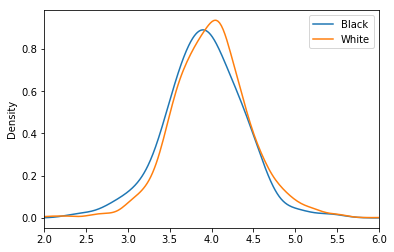

In [57]:
data[data["Ethnicity"].str.contains("Black")].Wage.plot.kde()
data[data["Ethnicity"].str.contains("White")].Wage.plot.kde()
plt.xlim(2,6)
plt.legend(["Black", "White"])
plt.show()

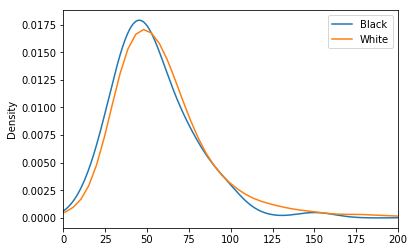

In [58]:
np.exp(data[data["Ethnicity"].str.contains("Black")].Wage).plot.kde()
np.exp(data[data["Ethnicity"].str.contains("White")].Wage).plot.kde()
plt.xlim(0,200)
plt.legend(["Black", "White"])
plt.show()

In [70]:
print(data[data["Ethnicity"].str.contains("Black")].Wage.mean() - data[data["Ethnicity"].str.contains("White")].Wage.mean())
print(np.exp(data[data["Ethnicity"].str.contains("Black")].Wage.mean() - data[data["Ethnicity"].str.contains("White")].Wage.mean()) - 1)

-0.07808540370272388
-0.07511456547022222


In [ ]:
# %%
data[data["Gender_Woman"]].Wage.plot.kde()
data[~data["Gender_Woman"]].Wage.plot.kde()
plt.xlim(2,6)
plt.legend(["Women", "Men"])
plt.show()

In [ ]:
np.exp(data[data["Gender_Woman"]].Wage).plot.kde()
np.exp(data[~data["Gender_Woman"]].Wage).plot.kde()
plt.xlim(0,200)
plt.legend(["Women", "Men"])
plt.show()

In [ ]:
print(data[data["Gender_Woman"]].Wage.mean() - data[~data["Gender_Woman"]].Wage.mean())
print(np.exp(data[data["Gender_Woman"]].Wage.mean() - data[~data["Gender_Woman"]].Wage.mean()) - 1)